In [9]:
from mfbml.problems.illutrative_problems import mf_Forrester
from mfbml.methods.kernel_ridge_regression import KernelRidgeRegression
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# define the problem 
problem = mf_Forrester()
sample_x = np.linspace(0, 1, 10).reshape(-1, 1)
sample_y = problem.hf(sample_x, noise_std=0.0)

# test x    
test_x = np.linspace(0, 1, 100)
test_y = problem.hf(test_x, noise_std=0.0)



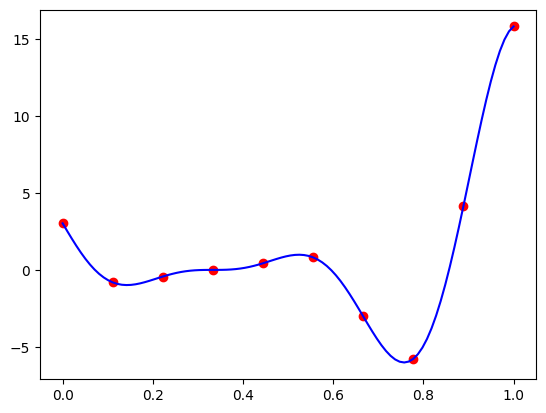

In [15]:
# plot the data
plt.figure()
plt.plot(sample_x, sample_y, 'ro')
plt.plot(test_x, test_y, 'b-')
plt.show()

In [19]:
# define the noiseless kernel ridge regression
model = KernelRidgeRegression(design_space=problem.design_space, 
                              params_optimize=True,
                              optimizer_restart=10,
                              noise_data=False,
                              )
model.train(sample_x, sample_y)

# predict the test data
pred_y = model.predict(test_x.reshape(-1, 1))

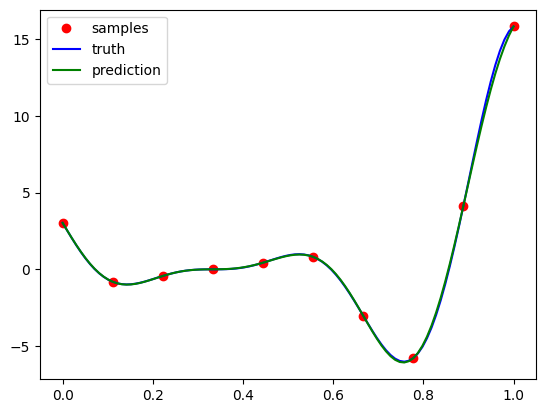

In [21]:
# plot the prediction of kernel ridge regression
plt.figure()
plt.plot(sample_x, sample_y, 'ro', label='samples')
plt.plot(test_x, test_y, 'b-', label='truth')
plt.plot(test_x, pred_y, 'g-', label='prediction')
plt.legend()
plt.show()

In [26]:
# show case of the noisy kernel ridge regression
sample_x = np.linspace(0, 1, 20).reshape(-1, 1)
sample_y = problem.hf(sample_x, noise_std=0.3)
model_noise = KernelRidgeRegression(design_space=problem.design_space,
                                    params_optimize=True,
                                    optimizer_restart=10,
                                    noise_data=True,
                                    )
model_noise.train(sample_x, sample_y)
pred_y = model_noise.predict(test_x.reshape(-1, 1))



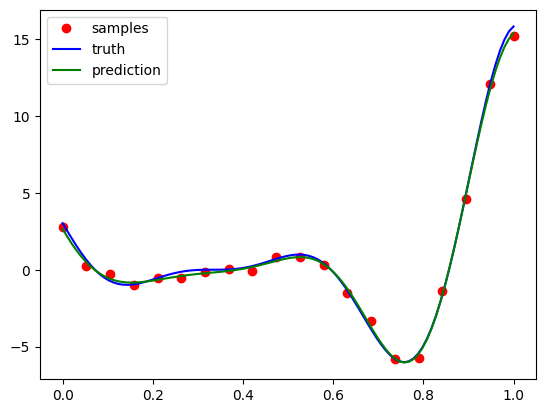

In [27]:
# plot the prediction of kernel ridge regression
plt.figure()
plt.plot(sample_x, sample_y, 'ro', label='samples')
plt.plot(test_x, test_y, 'b-', label='truth')
plt.plot(test_x, pred_y, 'g-', label='prediction')
plt.legend()
plt.show()